#Prediction of Covid_19 cases

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing Packages
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as pp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

%matplotlib inline

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



#read the data and store data titled time_series_covid19_confirmed_global.csv
covid_19_trend = ('/content/drive/My Drive/Stomble_Task/time_series_covid19_confirmed_global.csv')

#read the data and store data in DataFrame titled time_series_covid19_confirmed_global.csv
covid_19_df = pd.read_csv(covid_19_trend) 
covid_19_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/01/2020,2/02/2020,2/03/2020,2/04/2020,2/05/2020,2/06/2020,2/07/2020,2/08/2020,2/09/2020,2/10/2020,2/11/2020,2/12/2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/09/2021,1/10/2021,1/11/2021,1/12/2021,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/01/2021,2/02/2021,2/03/2021,2/04/2021,2/05/2021,2/06/2021,2/07/2021,2/08/2021,2/09/2021,2/10/2021,2/11/2021,2/12/2021,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400


#Data PreProcessing

Number of samples per country in our data

In [4]:
%pip install geopandas

     |████████████████████████████████| 972kB 12.0MB/s 
     |████████████████████████████████| 14.8MB 306kB/s 
     |████████████████████████████████| 6.5MB 43.4MB/s 


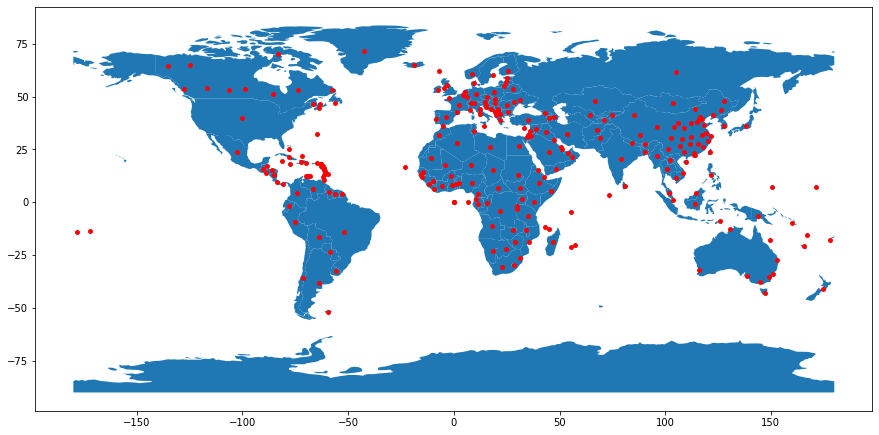

In [5]:
#Data Visualization of Number of Cases world-wide 
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(covid_19_df['Long'], covid_19_df['Lat'])]
gdf = GeoDataFrame(covid_19_df[['Lat','Long']], geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 10)), marker='o', color='red', markersize=15);

In [6]:
#shape of the data
covid_19_df.shape


(273, 397)

In [7]:
#changing the dataframe format from wide to long using melt() function
covid_19_df_long = pd.melt(covid_19_df, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                          var_name = 'Dates',
                          value_name = 'Number_of_cases')
covid_19_df_long

,Province/State,Country/Region,Lat,Long,Dates,Number_of_cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
107284,NaN,Vietnam,14.058324,108.277199,2/17/21,2329
107285,NaN,West Bank and Gaza,31.952200,35.233200,2/17/21,170527
107286,NaN,Yemen,15.552727,48.516388,2/17/21,2151
107287,NaN,Zambia,-13.133897,27.849332,2/17/21,71677


In [8]:
#shape of the changed format
covid_19_df_long.shape


(107289, 6)

In [9]:
covid_19_df_long.index

RangeIndex(start=0, stop=107289, step=1)

In [10]:
#Top 10 Countries with confirmed number of cases
top_10 = covid_19_df_long.groupby(['Country/Region']).Number_of_cases.sum().sort_values(ascending=False)
top_10

Country/Region
US                  2917455878
India               1595769302
Brazil              1315404571
Russia               469691189
France               358535234
                       ...    
Solomon Islands           1896
Marshall Islands           400
Samoa                      178
Vanuatu                    100
Micronesia                  28
Name: Number_of_cases, Length: 192, dtype: int64

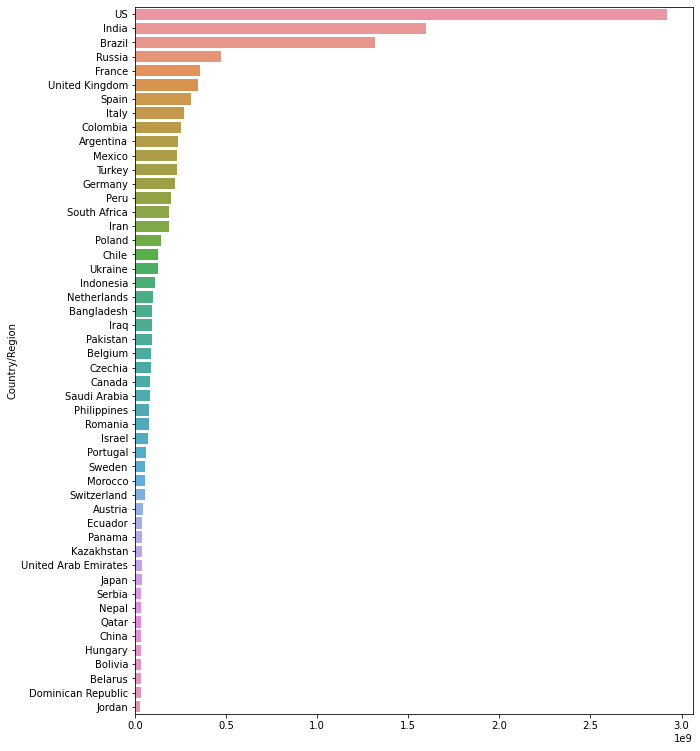

In [11]:
# Top 50 Country wise Confirmed cases acc to given data

fig, ax = plt.subplots(figsize=(10, 13))
sns.barplot(y=top_10.index[:50], x=top_10.values[:50])

In [12]:
#dsiplaying the columns in the dataset
covid_19_df_long.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Dates',
       'Number_of_cases'],
      dtype='object')

In [13]:
#checking for missing values
covid_19_df_long.isnull().sum()

Province/State     74277
Country/Region         0
Lat                  393
Long                 393
Dates                  0
Number_of_cases        0
dtype: int64

In [14]:
#Dropping the Repatriated Travellers as there is a missing values for Lat and Long
covid_19_df_long.dropna(axis=0, subset=['Lat'])
covid_19_df_long.dropna(axis=0, subset=['Long'])
covid_19_df_long

,Province/State,Country/Region,Lat,Long,Dates,Number_of_cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
107284,NaN,Vietnam,14.058324,108.277199,2/17/21,2329
107285,NaN,West Bank and Gaza,31.952200,35.233200,2/17/21,170527
107286,NaN,Yemen,15.552727,48.516388,2/17/21,2151
107287,NaN,Zambia,-13.133897,27.849332,2/17/21,71677


In [15]:

#typecasting the categorical features to a category dtype
covid_19_df_long['Province/State'] = covid_19_df_long['Province/State'].astype('category').cat.codes
covid_19_df_long['Country/Region'] = covid_19_df_long['Country/Region'].astype('category').cat.codes

print(covid_19_df_long.dtypes)

Province/State        int8
Country/Region       int16
Lat                float64
Long               float64
Dates               object
Number_of_cases      int64
dtype: object


In [16]:
X =covid_19_df_long[['Province/State','Country/Region','Lat','Long','Dates']]

y = covid_19_df_long['Number_of_cases']

#Spliting the data for Training and Testing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state= 0)  #training and trsting the data


In [18]:
X_train

,Province/State,Country/Region,Lat,Long,Dates
52916,-1,156,48.669000,19.699000,8/02/2020
76261,-1,40,-4.038300,21.758700,10/27/20
4315,-1,149,0.186400,6.613100,2/06/2020
64665,-1,166,60.128161,18.643501,9/14/20
2329,-1,78,64.963100,-19.020800,1/30/20
...,...,...,...,...,...
21243,-1,151,14.497400,-14.452400,4/08/2020
45891,-1,20,-16.290200,-63.588700,7/08/2020
42613,-1,18,9.307700,2.315800,6/26/20
43567,-1,93,29.311660,47.481766,6/29/20


In [19]:
X_test

,Province/State,Country/Region,Lat,Long,Dates
69734,18,62,-17.679700,149.406800,10/03/2020
35218,-1,1,41.153300,20.168300,5/30/20
58618,-1,125,-40.900600,174.886000,8/23/20
104458,-1,105,-18.766947,46.869107,2/07/2021
21896,-1,34,15.454200,18.732200,4/11/2020
...,...,...,...,...,...
83980,-1,102,55.169400,23.881300,11/24/20
98891,27,36,26.815400,106.874800,1/18/21
64417,76,182,21.694000,-71.797900,9/13/20
87372,71,8,-34.928500,138.600700,12/07/2020


In [20]:
y_train

52916     2344
76261    11191
4315         0
64665    86505
2329         0
         ...  
21243      244
45891    42984
42613     1053
43567    45524
68268     3838
Name: Number_of_cases, Length: 85831, dtype: int64

In [21]:
y_test

69734      1964
35218      1122
58618      1683
104458    19360
21896        11
          ...  
83980     49368
98891       147
64417       646
87372       562
28230       315
Name: Number_of_cases, Length: 21458, dtype: int64